# In this project, data about human evolution will be analyzed to understand how various environmental factors shaped hominid evolution

### Data from this project was downloaded from Kaggle: https://www.kaggle.com/datasets/santiago123678/biological-data-of-human-ancestors-data-sets?select=Homininos_DataSet+%281%29.csv

## Import data into a pandas dataframe:

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns

ev_data = pd.read_csv('Homininos_DataSet (1).csv')
print(ev_data.head(10))

                       Genus_&_Specie        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   
5                 Paranthropus Boisei    2.3-1.2    Africa        oriental   
6                        Homo Erectus    1.3-1.1     Asia      easter-Asia   
7                         Homo Naledi     300-225   Africa           south   
8                      Homo Georgicus         1.8    Asia         euroAsia   
9             Australopithecus Sediba         1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33 

# Clean up a little bit:

In [475]:
ev_data = ev_data.drop(columns=['Torus_Supraorbital', 'Canines_Shape', 'Tooth_Enamel', 'Prognathism', 'biped', 'Arms', 'Foots', 'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Skeleton','Foramen_Mágnum_Position'])
print(ev_data.head(10))

                       Genus_&_Specie        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   
5                 Paranthropus Boisei    2.3-1.2    Africa        oriental   
6                        Homo Erectus    1.3-1.1     Asia      easter-Asia   
7                         Homo Naledi     300-225   Africa           south   
8                      Homo Georgicus         1.8    Asia         euroAsia   
9             Australopithecus Sediba         1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33 

In [476]:
ev_data = ev_data.rename(columns = {'Genus_&_Specie':'Genus_Species', 'Canine Size':'Canine_Size', 'Tecno':'Tech', 'Tecno_type':'Tech_Type'})
print(ev_data.head())

                        Genus_Species        Time Location            Zone  \
0          Australopithecus Anamensis   4.2- 3.9    Africa        oriental   
1  hominino Sahelanthropus tchadensis           7   Africa         central   
2          Australopithecus Afarensis  3.9 - 2.9    Africa        oriental   
3  hominino Sahelanthropus tchadensis           7   Africa         central   
4                Homo Heidelbergensis     500-250   Europa  central-europe   

    Current_Country         Habitat  Cranial_Capacity  Height Incisor_Size  \
0             Kenya  forest-gallery            281.19  132.33          big   
1  Republic of Chad           mixed             94.12   87.49        small   
2             Kenya           mixed            311.48  120.44          big   
3  Republic of Chad           mixed            196.00   88.40        small   
4           Germany     cold forest           1232.46  167.60        small   

  Jaw_Shape Canine_Size Tech Tech_Type         Diet Migrated  

## Check Data Types and DataFrame Info

In [477]:
print(ev_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genus_Species     720 non-null    object 
 1   Time              720 non-null    object 
 2   Location          720 non-null    object 
 3   Zone              720 non-null    object 
 4   Current_Country   720 non-null    object 
 5   Habitat           720 non-null    object 
 6   Cranial_Capacity  720 non-null    float64
 7   Height            720 non-null    float64
 8   Incisor_Size      720 non-null    object 
 9   Jaw_Shape         720 non-null    object 
 10  Canine_Size       720 non-null    object 
 11  Tech              720 non-null    object 
 12  Tech_Type         720 non-null    object 
 13  Diet              720 non-null    object 
 14  Migrated          720 non-null    object 
dtypes: float64(2), object(13)
memory usage: 84.5+ KB
None


## Want to clean up the time column

### For the purposes of this analysis, will use the average time for points that are given as a range. 
### First, split up the ranges into lists of values, then clean up the strings to convert to floats. Times are in either millions of years or hundreds of thousands of years. Will also need to normalize to the same unit, millions of years.

In [478]:
ev_data['Time'] = ev_data['Time'].str.strip()
ev_data['Time'] = ev_data['Time'].apply(lambda row: row.split('-') if '-' in row else row)
print(ev_data.head(10))
print(ev_data.info())

                        Genus_Species          Time Location            Zone  \
0          Australopithecus Anamensis   [4.2,  3.9]   Africa        oriental   
1  hominino Sahelanthropus tchadensis             7   Africa         central   
2          Australopithecus Afarensis  [3.9 ,  2.9]   Africa        oriental   
3  hominino Sahelanthropus tchadensis             7   Africa         central   
4                Homo Heidelbergensis    [500, 250]   Europa  central-europe   
5                 Paranthropus Boisei    [2.3, 1.2]   Africa        oriental   
6                        Homo Erectus    [1.3, 1.1]    Asia      easter-Asia   
7                         Homo Naledi    [300, 225]   Africa           south   
8                      Homo Georgicus           1.8    Asia         euroAsia   
9             Australopithecus Sediba           1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery     

In [479]:
avgtime = []
for i,row in ev_data['Time'].items():
    if isinstance(row, list) == True:
        first = row[0].strip()
        second = row[1].strip()
        if 'ma' in first:
            new_first = float(first.strip('ma'))
            new_sec = float(second)
            new_second = new_sec/1000
        elif '.' in first and '.' in second:
            new_first = float(first)
            new_second = float(second)
        else: 
            new_first = float(first)/1000
            new_second = float(second)/1000
        newrow = (new_first+new_second)/2
        avgtime.append(newrow)
    else:
        if '0' in row:
            new_row = float(row)/1000
        else:
            new_row = float(row)
        avgtime.append(new_row)

ev_data['Avg_Time'] = avgtime
print(ev_data.head(10))

                        Genus_Species          Time Location            Zone  \
0          Australopithecus Anamensis   [4.2,  3.9]   Africa        oriental   
1  hominino Sahelanthropus tchadensis             7   Africa         central   
2          Australopithecus Afarensis  [3.9 ,  2.9]   Africa        oriental   
3  hominino Sahelanthropus tchadensis             7   Africa         central   
4                Homo Heidelbergensis    [500, 250]   Europa  central-europe   
5                 Paranthropus Boisei    [2.3, 1.2]   Africa        oriental   
6                        Homo Erectus    [1.3, 1.1]    Asia      easter-Asia   
7                         Homo Naledi    [300, 225]   Africa           south   
8                      Homo Georgicus           1.8    Asia         euroAsia   
9             Australopithecus Sediba           1.9   Africa           south   

    Current_Country         Habitat  Cranial_Capacity  Height  Incisor_Size  \
0             Kenya  forest-gallery     

# Question 1: Did cranial capacity increase over time for each species?

['Australopithecus Anamensis' 'hominino Sahelanthropus tchadensis'
 'Australopithecus Afarensis' 'Homo Heidelbergensis' 'Paranthropus Boisei'
 'Homo Erectus' 'Homo Naledi' 'Homo Georgicus' 'Australopithecus Sediba'
 'Paranthropus Robustus' 'Australopithecus Garhi' 'Homo Sapiens'
 'Homo Rudolfensis' 'Homo Floresiensis' 'Homo Habilis' 'Homo Antecesor'
 'Homo Neanderthalensis\n' 'hominino Ardipithecus ramidus / kabadda'
 'Australopithecus Bahrelghazali' 'Homo Ergaster'
 'Australopithecus Africanus' 'Paranthropus Aethiopicus'
 'hominino Orrorin tugenencin' 'Homo Rodhesiensis']


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

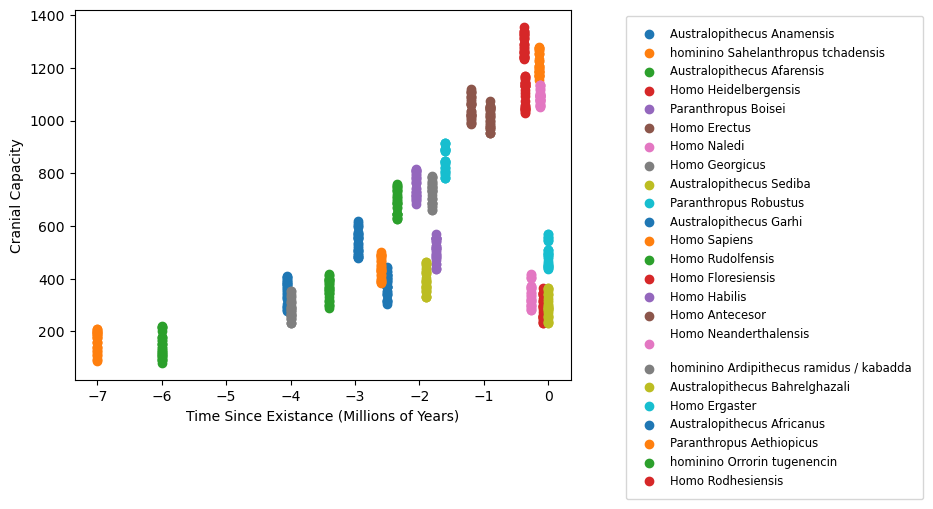

In [480]:
unique_species = ev_data['Genus_Species'].unique()
print(unique_species)
austra_anam_avg_times = []
austra_anam_cran_capac = []
for species in unique_species:
    species_df = ev_data[ev_data['Genus_Species'] == species]
    plt.scatter((species_df['Avg_Time']*-1), species_df['Cranial_Capacity'])
    plt.xlabel('Time Since Existance (Millions of Years)')
    plt.ylabel('Cranial Capacity')

plt.legend(unique_species, bbox_to_anchor=(1.1,1), loc='upper left', fontsize = 'small', borderpad = 1)
plt.show
plt.close

## Brain power seems to have generally increased over time based on this plot, though there is not relevant data to determine if it increased over time within each species. To confirm the general correlation with time, we will check the correlation across the whole dataset, then look at an individual species.

### It appears that rather than there being multiple points in time recorded for each species, there are multiple data recordings for each species recorded for the same time period. This makes the correlation with time act less like it would if time were a more continuous variable as expected.

In [481]:
cran_capac_time_corr, p = pearsonr(ev_data['Avg_Time'], ev_data['Cranial_Capacity'])
print(cran_capac_time_corr)

-0.5699854238943335


### This value is originally negative because the time reported is the time since existence based on current time. We multiplied by -1 to convert it to a more intuitive relative time.

#### There is not a very strong correlation with time and cranial capacity within the entire dataset. Is that due to variations between different species? Some must have been more intelligent than others. Next, we will look at an individual species over time.

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

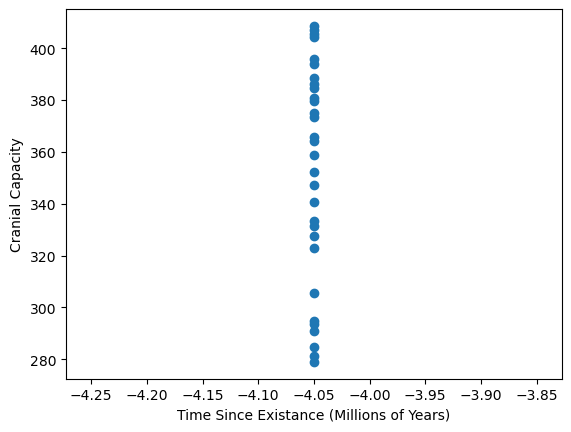

In [482]:
austra_anam_df = ev_data[ev_data['Genus_Species'] == 'Australopithecus Anamensis']
plt.scatter((austra_anam_df['Avg_Time']*-1), austra_anam_df['Cranial_Capacity'])
plt.xlabel('Time Since Existance (Millions of Years)')
plt.ylabel('Cranial Capacity')
plt.show
plt.close

## There is not enough data to show changes over time, and time should be treated as a categorical variable rather than a coninuous numerical variable.

# Question 2: Did species who used tools have higher cranial capacity than species who did not use tools?

<Axes: xlabel='Tech', ylabel='Cranial_Capacity'>

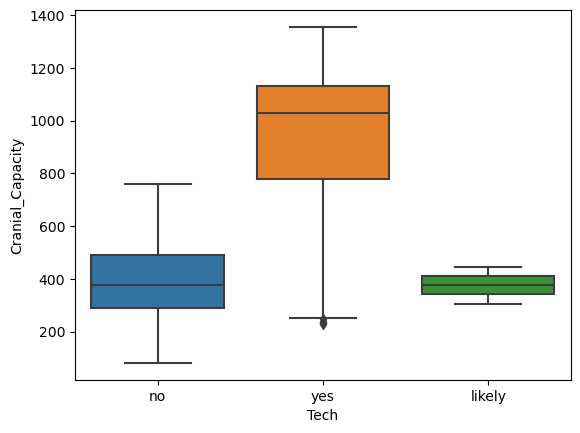

In [483]:
sns.boxplot(data = ev_data, x='Tech', y='Cranial_Capacity')

## Based on this boxplot, it seems that species with tools had a higher cranial capacity than species who did not use tools. To check, we will evalute the difference of the mean cranial capacities for species with and without technology.

In [484]:
mean_cran_capac_tech = ev_data[ev_data['Tech'] == 'yes'].Cranial_Capacity.mean()
mean_cran_capac_no_tech = ev_data[ev_data['Tech'] == 'no'].Cranial_Capacity.mean()
diff_cran_capac_tech = mean_cran_capac_tech - mean_cran_capac_no_tech
print('mean difference is:', diff_cran_capac_tech)

mean difference is: 552.2790435897434


## Based on the mean difference and boxplot, it appears that there is a correlation between cranial capacity and species who have acquired technologies and species who haven't, and species who used tools generally had a higher cranial capacity than species who didn't.

# Question 3: Did diet impact cranial capacity?

<Axes: xlabel='Diet', ylabel='Cranial_Capacity'>

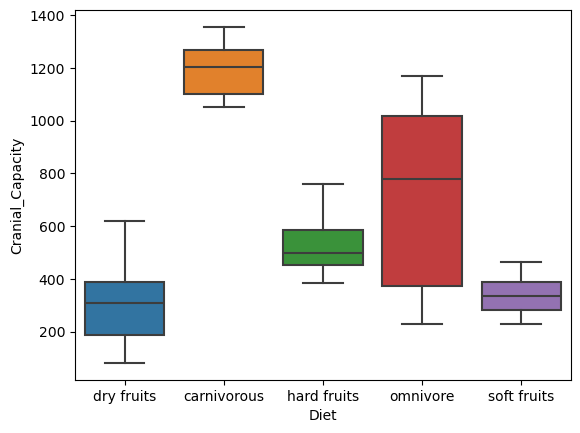

In [485]:
sns.boxplot(data = ev_data, x='Diet', y='Cranial_Capacity')

## Wow, that is a pretty huge difference, and appears to be significant even between carnivores and omnivores. What are the core statistical values for carnivores, omnivores, and hard fruit eaters?

In [486]:
carnivores = ev_data[ev_data['Diet'] == 'carnivorous']
omnivores = ev_data[ev_data['Diet'] == 'omnivore']
hard_fruits = ev_data[ev_data['Diet'] == 'hard fruits']
print('Carnivores:\n', carnivores.describe())
print('Omnivores:\n', omnivores.describe())
print('Hard Fruits:\n', hard_fruits.describe())

Carnivores:
        Cranial_Capacity      Height   Avg_Time
count         90.000000   90.000000  90.000000
mean        1197.068222  167.236778   0.220500
std           88.689052    9.199335   0.110069
min         1052.920000  148.120000   0.135000
25%         1102.110000  161.580000   0.135000
50%         1203.270000  167.315000   0.151500
75%         1266.345000  174.432500   0.375000
max         1355.730000  184.050000   0.375000
Omnivores:
        Cranial_Capacity      Height    Avg_Time
count        270.000000  270.000000  270.000000
mean         722.209741  142.048778    1.194444
std          302.453110   21.068545    0.808976
min          230.080000   90.620000    0.075000
25%          371.737500  127.295000    0.362500
50%          776.965000  145.865000    1.200000
75%         1016.527500  158.445000    1.800000
max         1168.960000  179.660000    2.500000
Hard Fruits:
        Cranial_Capacity      Height    Avg_Time
count        120.000000  120.000000  120.000000
mean      

#### These summary statistics show that carnivores on average had more brain capacity; their mean is higher than the max value of the omnivores and much higher than the max of the hard fruit eaters. Additionally, carnivores were on average taller than the omnivores, and much taller than the hard fruit eaters. 

#### The times that the omnivores and hard fruit eaters were alive are on average much longer ago than the carnivores. The difference in cranial capacity could be more related to the further progression of evolution rather than being caused by diet.

#### The range of the omnivore group is very high, much higher than the ranges of the carnivores or the hard fruit eaters. The minimum values for the omnivorous group and the hard fruit eaters are very similar, while the maximum values for the omnivorous group is about 50% higher than the omnivorous group. Because 'omnivore' could mean any mix of a meat and plant-based diet, the data from the other two groups lead me to believe that the minimum-value omnivores for height and cranial capacity could have had a more plant-based diet while the carnivores could have had a more meat-based diet, while the middle values could have been mixed. That is just a hypothesis, and cannot be better understood with the data in this dataset. 

### These summary statistics show an interesting story about diet and species advancement around metrics including height and cranial capacity, though there is not enough data here to develop a causal relationship between diet and any metric. There are other confounding variables at play, including the time in which these species lived - more developed species at more recent times were shown earlier to generally have a higher cranial capacity than species who lived longer ago. Therefore no strong conclusions can be made here about whether a species' diet could have caused increased brain or bodily development. There is a bit of a chicken-egg situation- could they have become carnivores due to their higher cranial capacity and therefore their ability to use tools? Or did their diet cause their brain to better develop? This dataset will not be able to answer those questions.

# Question 4: How much did type of diet depend on habitat?

In [487]:
diet_habitat_freq = pd.crosstab(ev_data['Diet'], ev_data['Habitat'])
print(diet_habitat_freq)

Habitat      all  cold forest  forest  forest-gallery  forest-savanna  jungle  \
Diet                                                                            
carnivorous   30           60       0               0               0       0   
dry fruits     0            0      30              60               0       0   
hard fruits    0            0      30               0              30      30   
omnivore       0            0       0               0               0      30   
soft fruits    0            0       0               0               0       0   

Habitat      mixed  peninsular  savannah  
Diet                                      
carnivorous      0           0         0  
dry fruits      90           0         0  
hard fruits      0           0        30  
omnivore        30          30       180  
soft fruits     60           0         0  


### Use chi2 to evaluate if there is an association between these variables

In [488]:
chi2, pval, dof, expected = chi2_contingency(diet_habitat_freq)
print('chi2:', chi2, '\npval:', pval)

chi2: 1650.4761904761904 
pval: 0.0


### high chi2 and low pval indicate a correlation, so based on this chi2 value these two categorical variables are correlated.

# Question 5: Is diet correlated with incisor and canine size?

In [489]:
diet_incisor_freq = pd.crosstab(ev_data['Diet'], ev_data['Incisor_Size'])
print(diet_incisor_freq)
chi2, pval, dof, expected = chi2_contingency(diet_incisor_freq)
print('Expected Table:\n', expected)
print('chi2:\n', chi2)

Incisor_Size  big  medium large  megadony  small  very small
Diet                                                        
carnivorous    30             0         0     30          30
dry fruits     60             0         0    120           0
hard fruits     0             0        90     30           0
omnivore       90            60         0     60          60
soft fruits     0             0         0     60           0
Expected Table:
 [[ 22.5    7.5   11.25  37.5   11.25]
 [ 45.    15.    22.5   75.    22.5 ]
 [ 30.    10.    15.    50.    15.  ]
 [ 67.5   22.5   33.75 112.5   33.75]
 [ 15.     5.     7.5   25.     7.5 ]]
chi2:
 816.6666666666667


In [490]:
diet_canine_freq = pd.crosstab(ev_data['Diet'], ev_data['Canine_Size'])
print(diet_canine_freq)
chi2, pval, dof, expected = chi2_contingency(diet_canine_freq)
print('Expected Table:\n', expected)
print('chi2:\n', chi2)

Canine_Size  big  small
Diet                   
carnivorous    0     90
dry fruits   120     60
hard fruits  120      0
omnivore      90    180
soft fruits    0     60
Expected Table:
 [[ 41.25  48.75]
 [ 82.5   97.5 ]
 [ 55.    65.  ]
 [123.75 146.25]
 [ 27.5   32.5 ]]
chi2:
 317.20279720279717


# Question 6: Is there a correlation between height and cranial capacity?

## Build a linear regression model

In [491]:
def calculate_linear_error(m,b,point):
    x = point[0]
    y = point[1]
    y_calc = m * x + b
    error = abs(y-y_calc)
    return error

In [492]:
def linear_reg_model(xvals, yvals, m_range_low, m_range_high, m_step, b_range_low, b_range_high, b_step):

    possible_ms = [m for m in range(m_range_low,m_range_high,m_step)]
    possible_bs = [b for b in range(b_range_low,b_range_high,b_step)]
    datapoints = list(zip(xvals,yvals))

    smallest_error = float("inf")
    best_m = 0
    best_b = 0

    for m in possible_ms:
        for b in possible_bs:
            total_error = 0
            for point in datapoints:
                point_error = calculate_linear_error(m,b,point)
                total_error = total_error + point_error
            if total_error < smallest_error:
                smallest_error = total_error
                best_m = m                
                best_b = b

    return best_m, best_b, smallest_error

In [493]:
xvals = ev_data['Height']
yvals = ev_data['Cranial_Capacity']
heightcc_m, heightcc_b, error = linear_reg_model(xvals, yvals, -10,100,1,-1000,10,1)
print(heightcc_m)
print(heightcc_b)

12
-953


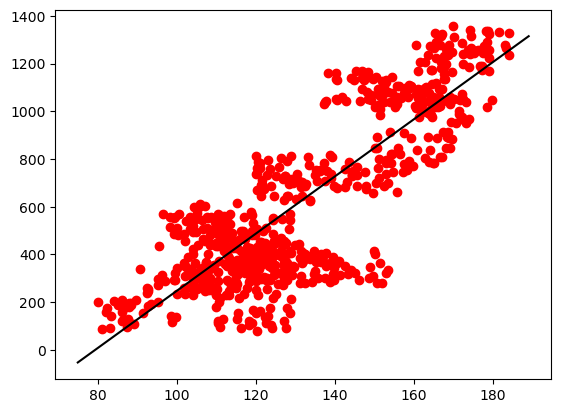

In [494]:
xtest = list(range(75,190,1))
ycalc = [heightcc_m*x + heightcc_b for x in xtest]

plt.scatter(xvals,yvals, color='red')
plt.plot(xtest,ycalc, color='k')
plt.show()
plt.close()

## Determine the correlation:

In [495]:
height_crancapac_corr, p = pearsonr(ev_data['Height'], ev_data['Cranial_Capacity'])
print('Correlation Coefficient:', height_crancapac_corr)

Correlation Coefficient: 0.8313012326809213


### That is not as close to 1 as was expected, but still indicates there is a correlation between the two variables.

# Based on this data, it appears that cranial capacity in hominids increased over time. High cranial capacity was correlated with the species' use of tools and technology and their diets. Diet in turn was related to the species' habitats and the sizes of their incisor and canine teeth. Finally, species' height was directly correlated to their cranial capacity, with a correlation coefficient of 0.83.